# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.320409e+01     1.474268e+01
 * time: 0.0045070648193359375
     1     6.164126e+01     9.499352e+00
 * time: 0.01341104507446289
     2     5.616497e+01     1.324618e+01
 * time: 0.034414052963256836
     3     3.977392e+01     9.018582e+00
 * time: 0.06326007843017578
     4     2.971047e+01     8.540711e+00
 * time: 0.17762494087219238
     5     2.376893e+01     6.800026e+00
 * time: 0.20275402069091797
     6     1.084874e+01     1.895567e+00
 * time: 0.23007988929748535
     7     1.053763e+01     3.524275e+00
 * time: 0.24757790565490723
     8     8.426693e+00     2.372643e+00
 * time: 0.268841028213501
     9     8.237876e+00     4.585955e+00
 * time: 0.28555989265441895
    10     7.451501e+00     3.115462e+00
 * time: 0.3067469596862793
    11     7.151262e+00     3.221895e+00
 * time: 0.3301079273223877
    12     6.928951e+00     2.482755e+00
 * time: 0.34682297706604004
    13     6.702464e+00     2.564466e+00
 * time: 

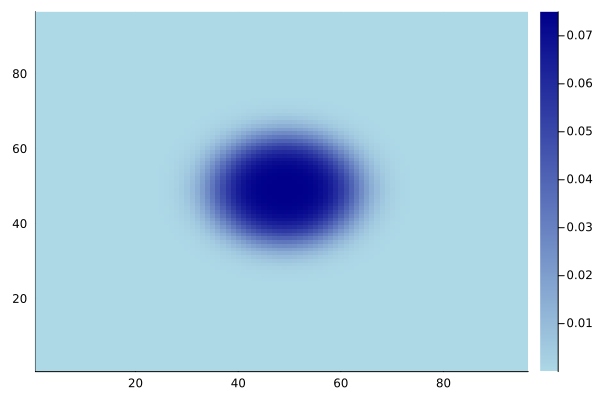

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)